In [ ]:
!pip install pandapower

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


Arc: Arc(xy=(2.99411, -1.30283), width=0.05, height=0.1, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(1.85281, 0.827468), width=0.05, height=0.1, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.41233, 1.42322), width=0.05, height=0.1, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(3.84986, -0.753004), width=0.05, height=0.1, angle=0, theta1=245, theta2=300)

Bus:


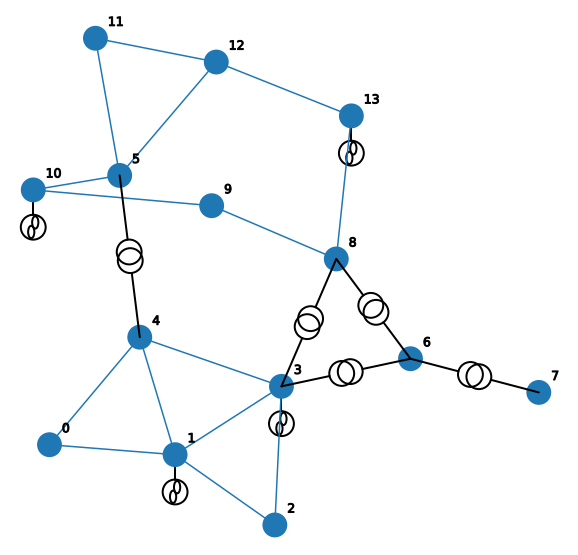

In [ ]:
# Load pandapower grid
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplot
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time

# net  = nw.case39()
net = nw.case14()

bc = pplot.create_bus_collection(net, buses=net.bus.index, size=0.1)
coords = zip(net.bus_geodata.x.loc[net.bus.index].values + 0.1, net.bus_geodata.y.loc[net.bus.index].values + 0.1) 
acb = pplot.create_annotation_collection(size=0.1, texts=np.char.mod('%d', net.bus.index),\
                                            coords=coords, zorder=3, color='black')
lc = pplot.create_line_collection(net, net.line.index)
tc = pplot.create_trafo_collection(net, net.trafo.index, size=0.1)
gc = pplot.create_gen_collection(net, net.gen.index, size=0.1, zorder=0)
extgrc = pplot.create_ext_grid_collection(net, size=0.01,zorder=0)
ax = pplot.draw_collections([bc,lc,tc,acb,gc,extgrc],figsize=(8,8))
plt.savefig('14-network.svg')
plt.savefig('14-network.pdf')

# Sort dataframes
net.bus = net.bus.sort_index()
net.load = net.load.sort_index()
net.gen = net.gen.sort_index()
# relaxed version
net.bus['max_vm_pu'] = 1.10
net.bus['min_vm_pu'] = 0.90
pp.runpp(net)
print('\nBus:')

In [ ]:
pp.runpp(net) # runs a powerflow
pp.runopp(net) # runs an optimal power flow
print(net.res_bus) 

In [ ]:
net.bus 

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.1,0.9,1,b,345.0,2
1,True,1.1,0.9,2,b,345.0,2
2,True,1.1,0.9,3,b,345.0,2
3,True,1.1,0.9,4,b,345.0,1
4,True,1.1,0.9,5,b,345.0,1
5,True,1.1,0.9,6,b,345.0,1
6,True,1.1,0.9,7,b,345.0,1
7,True,1.1,0.9,8,b,345.0,1
8,True,1.1,0.9,9,b,345.0,1
9,True,1.1,0.9,10,b,345.0,1


In [ ]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,29,True,True,None,250.0,1.0,NaN,None,1.0499,False,1040.0,0.0,400.0,140.0
1,31,True,True,None,650.0,1.0,NaN,None,0.9841,False,725.0,0.0,300.0,150.0
2,32,True,True,None,632.0,1.0,NaN,None,0.9972,False,652.0,0.0,250.0,0.0
3,33,True,True,None,508.0,1.0,NaN,None,1.0123,False,508.0,0.0,167.0,0.0
4,34,True,True,None,650.0,1.0,NaN,None,1.0494,False,687.0,0.0,300.0,-100.0
5,35,True,True,None,560.0,1.0,NaN,None,1.0636,False,580.0,0.0,240.0,0.0
6,36,True,True,None,540.0,1.0,NaN,None,1.0275,False,564.0,0.0,250.0,0.0
7,37,True,True,None,830.0,1.0,NaN,None,1.0265,False,865.0,0.0,300.0,-150.0
8,38,True,True,None,1000.0,1.0,NaN,None,1.0300,False,1100.0,0.0,300.0,-100.0


In [ ]:
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,0,0.0,0.0,False,True,None,97.60,44.2,1.0,NaN,None
1,2,0.0,0.0,False,True,None,322.00,2.4,1.0,NaN,None
2,3,0.0,0.0,False,True,None,500.00,184.0,1.0,NaN,None
3,6,0.0,0.0,False,True,None,233.80,84.0,1.0,NaN,None
4,7,0.0,0.0,False,True,None,522.00,176.6,1.0,NaN,None
5,8,0.0,0.0,False,True,None,6.50,-66.6,1.0,NaN,None
6,11,0.0,0.0,False,True,None,8.53,88.0,1.0,NaN,None
7,14,0.0,0.0,False,True,None,320.00,153.0,1.0,NaN,None
8,15,0.0,0.0,False,True,None,329.00,32.3,1.0,NaN,None
9,17,0.0,0.0,False,True,None,158.00,30.0,1.0,NaN,None


In [ ]:
net.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.06,332.4,0.0,10.0,0.0


In [ ]:

n_loads = net.load.shape[0]
n_gen = net.gen.shape[0]
import copy
# Extract nominal powers
p_load_base = copy.deepcopy(net.load['p_mw'].values)
q_load_base = copy.deepcopy(net.load['q_mvar'].values)
print(p_load_base)
def sample_random_load(p_load_base, q_load_base, low=0.7, high=1.1, n_loads=n_loads):
    """
    Sample from uniform distribution if range [low, high] and multiply by base load.
    """
    scaling_load = np.random.uniform(low=low, high=high, size=(n_loads))
    load_p, load_q = scaling_load*p_load_base, scaling_load*q_load_base
    return(load_p, load_q, scaling_load)

[  97.6   322.    500.    233.8   522.      6.5     8.53  320.    329.
  158.    680.    274.    247.5   308.6   224.    139.    281.    206.
  283.5     9.2  1104.  ]


In [ ]:
# calculates the time needed to run a number of samples
import time as t
def calc_Time_OPF(net, samples, n_loads=n_loads, p_load_base=p_load_base, q_load_base=q_load_base):
  Total_time = 0
  valid_samples = 0
  while (valid_samples < samples):
      nconv = False
      nconv2 = False
      load_p, load_q, scaling_load = sample_random_load(p_load_base, q_load_base, low=0.5, high=1.1, n_loads=n_loads)
      net.load['p_mw'] = load_p
      net.load['q_mvar'] = load_q
      net.load['scaling'] = scaling_load
      start = t.time()
      try:  
        pp.runopp(net)
      except:
        nconv2 = True
      end = t.time()
      timer = end-start
      if not nconv2:
         valid_samples +=1 
         Total_time += timer
      if (valid_samples % 10) == 0:
         print('Sample number %i converged. (%.2f seconds)' %(valid_samples,Total_time))  
     
  return Total_time

In [ ]:
# generate a sample  
def calc_datapoint(net, n_loads=n_loads, p_load_base=p_load_base, q_load_base=q_load_base):
    nconv = False
    nconv2 = False
    # 1. add loads
    load_p, load_q, scaling_load = sample_random_load(p_load_base, q_load_base, low=0.5, high=1.1, n_loads=n_loads)

    net.load['p_mw'] = load_p
    net.load['q_mvar'] = load_q
    net.load['scaling'] = scaling_load
    zero_Loads_39= [1,4,5,9,10,12,13,16,18,21]
    X_Raw = np.zeros(shape=(39,5))
    X_grid = np.zeros(shape=(39,5))
    X_opt =  np.zeros(shape=(39,5))


    # 2. build the initial state
    for i,e in enumerate(net.load.bus) : 
        X_Raw[e,0] = 1 
        X_Raw[e,1] = 1 
        X_Raw[e,2] = net.load.p_mw[i]
        X_Raw[e,3] = net.load.q_mvar[i]
        X_Raw[e,4] = 2
    for i,e in enumerate(net.ext_grid.bus) :   
        X_Raw[e,0] = net.ext_grid.vm_pu[i]
        X_Raw[e,1] = net.ext_grid.va_degree[i]
        X_Raw[e,2] = 1 
        X_Raw[e,3] = 1 
        X_Raw[e,4] = 4
    for i,e in enumerate(net.gen.bus) :
        X_Raw[e,0] = net.gen.vm_pu[i]
        X_Raw[e,1] = 1 
        X_Raw[e,2] = (X_Raw[e,2]-net.gen.p_mw[i])
        X_Raw[e,3] = 1 
        X_Raw[e,4] = 3
    
    for z in zero_Loads:
        X_Raw[z,0] = 1
        X_Raw[z,1] = 1
        X_Raw[z,4] = 2

    # 3. run pf
    try:
       pp.runpp(net)
    
    except:
       nconv2 = True
    X_grid = net.res_bus.values
    # 4. run opf
    try:
        pp.runopp(net)

    except:
        nconv = True

    X_opt = net.res_bus.values[:,:-2]

    return(X_Raw,X_grid,X_opt,nconv,nconv2)

stime = time.time()
samples= 1
for t in range(samples):
    x, y, z,_,_ = calc_datapoint(net,n_loads=n_loads, p_load_base=p_load_base, q_load_base=q_load_base)
    
etime = time.time()

print('1 sample takes approx. %.2f seconds' %((etime-stime)/samples))

In [ ]:
def run_simulation(runs):

  X_Raw_data = []
  X_grid_data = []
  X_opt_data = []
  stime = time.time()
  for t in range(runs):
      X_Raw, X_grid, X_opt,nconv,nconv2 = calc_datapoint(net,n_loads=n_loads, p_load_base=p_load_base, q_load_base=q_load_base)

      if not nconv and not nconv2:
        X_Raw_data.append(X_Raw)     
        X_grid_data.append(X_grid)
        X_opt_data.append(X_opt)
      

      if (t % 10) == 0:
              ntime = time.time()
              print('Run number %i finished. (%.2f seconds)' %(t, ntime - stime))

  X_Raw = np.array(X_Raw_data)
  X_grid = np.array(X_grid_data)
  X_opt = np.array(X_opt_data)
  print('%.2f percent converged!' %((X_grid.shape[0]/runs)*100.))

  return(X_Raw,X_grid,X_opt)

In [ ]:
# run simulations
X_Raw,X_grid,X_opt = run_simulation(20000)


Run number 0 finished. (1.15 seconds)
Run number 10 finished. (13.53 seconds)
Run number 20 finished. (25.35 seconds)
Run number 30 finished. (36.03 seconds)


In [ ]:
import pickle

def save_file(data):
    """
    Saving the pickle.
    """
    with open('Results_39_nodes.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved successfully!')
    return

def load_file(path):
    """
    Loading the pickle.
    """
    with open(path, 'rb') as handle:
        data = pickle.load(handle)
    return(data)

       vm_pu  va_degree        p_mw      q_mvar
0   1.044575   8.185916   29.732838   13.465076
1   1.050765  12.407719    0.000000    0.000000
2   1.036626   9.781243  245.820948    1.832206
3   1.017242   6.478793  339.037790  124.765907
4   1.016831   4.714721    0.000000    0.000000
5   1.017912   4.724283    0.000000    0.000000
6   1.009961   3.238336  251.352106   90.306146
7   1.010533   3.124636  386.532705  130.769494
8   1.042094   4.738496    5.424480  -55.580057
9   1.026938   8.867552    0.000000    0.000000
10  1.022890   7.489403    0.000000    0.000000
11  1.020503   8.082389    4.359410   44.973980
12  1.025420   8.738733    0.000000    0.000000
13  1.023334   8.584597    0.000000    0.000000
14  1.025725  11.792157  221.723256  106.011432
15  1.037796  14.246650  336.132166   33.000210
16  1.040285  12.662822    0.000000    0.000000
17  1.037647  11.207739  133.499324   25.347973
18  1.052658  19.931518    0.000000    0.000000
19  0.994256  19.373327  574.615897   87

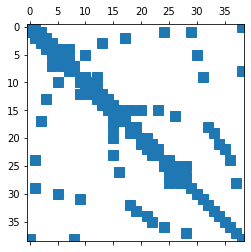

In [ ]:
# Retrieve un-normalized Laplacian matrix
pp.runpp(net)
print(net.res_bus)
print(net._ppc['internal'])
Y = net._ppc['internal']['Ybus']

print(Y)
print('Laplacian / Node admittance matrix:')
plt.spy(Y)

In [ ]:
# results
pf_results = dict()
pf_results['descr'] = 'Pandapower network 39 Nodes'
pf_results['net'] = net
pf_results['Y'] = Y
pf_results['X_Raw'] = X_Raw
pf_results['X_grid'] = X_grid
pf_results['X_opt'] = X_opt
save_file(pf_results)

Saved successfully!


In [ ]:
print(X_Raw.shape)
print(X_grid.shape)
print(X_opt.shape)

(16381, 39, 4)
(16381, 39, 4)
(16381, 39, 4)
